## Computer Assignment #3 (Naive Bayes Classification)
### Artificial Intelligence Course - Spring 2021
### Daneshvar Amrollahi (810197685)

#### The questions asked in the description are answered in the format Q_i) where i is the question number.

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("books_train.csv")
df.head(5)


,title,description,categories
0,ساختار نظریه‌های جامعه‌شناسی ایران,«ساختار نظریه‌های جامعه‌شناسی ایران» نوشته ابو...,جامعه‌شناسی
1,جامعه و فرهنگ کانادا,«جامعه و فرهنگ کانادا» از مجموعه کتاب‌های «جام...,جامعه‌شناسی
2,پرسش از موعود,پرسش‌های مختلفی درباره زندگی و شخصیت امام مهدی...,کلیات اسلام
3,موج، دریا,«موج دریا» به قلم مهری ماهوتی (-۱۳۴۰) و تصویرگ...,داستان کودک و نوجوانان
4,پرسش از غرب,«پرسش از غرب» به قلم دکتر اسماعیل شفیعی سروستا...,جامعه‌شناسی


In [3]:
from __future__ import unicode_literals
from hazm import *

normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

In [4]:
normalizer.normalize(df['title'][0])

'ساختار نظریه\u200cهای جامعه\u200cشناسی ایران'

This option seems to be removing semi-spaces (Nim faseleh). We don't need that here since the dataset is already guaranteed to have this standard.

In [5]:
print(stemmer.stem('رفتم'))
print(stemmer.stem('کتاب‌ها'))
print(stemmer.stem('دانشور'))
print(stemmer.stem('خوردن'))
print(stemmer.stem('سلام'))

رف
کتاب
دانشور
خوردن
سلا


### Q1)
I decided not choose this **stemming** option since this library doesn't seem to be accurate enough. It is destructing some normal words.

In [6]:
print(lemmatizer.lemmatize('می‌روی'))
print(lemmatizer.lemmatize('می‌خوری'))
print(lemmatizer.lemmatize('خواهد دید'))
print(lemmatizer.lemmatize('دیدم'))

رفت#رو
خورد#خور
خواهد دید
دید#بین


### Q1)
This option is giving us **Bon-e-Maazi** and **Bon-e-Mozare** of a verb in Farsi. Two verbs having the same **Bon** mostly have the same concept in a sentence so they can be used instead of each other.

In [7]:
word_tokenize(df['title'][1])

['جامعه', 'و', 'فرهنگ', 'کانادا']

This **word_tokenize()** is a good function to use since it breaks a sentence into it's words which we are going to need them later.

In [8]:
df['categories'].value_counts()

کلیات اسلام               425
داستان کوتاه              425
داستان کودک و نوجوانان    425
رمان                      425
جامعه‌شناسی               425
مدیریت و کسب و کار        425
Name: categories, dtype: int64

We have 425 samples of each category.

In [9]:
with open('stop_words.txt') as f:
    ignore = [line.rstrip() for line in f]

ignore = [x.strip() for x in ignore]
ignore[30:50]

['آزادانه',
 'آسان',
 'آسيب پذيرند',
 'آشكارا',
 'آشنايند',
 'آمرانه',
 'آن',
 'آن گاه',
 'آن ها',
 'آنان',
 'آناني',
 'آنجا',
 'آنچنان',
 'آنچنان كه',
 'آنچه',
 'آنرا',
 'آنقدر',
 'آنگاه',
 'آنها',
 'آنهاست']

**ignore**: List of words to ignore in text.

### Q2)

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

$x$: The word appeared

$c$: The book genre

$P(x|c)$ : Probability of seeing word $x$ in a book genre's description of type $c$ **(Likelihood)**

$P(c|x)$ : Probability of the current book genre being $c$ knowing that the word $x$ has appeared in the title. **(Posterior)**

$P(c)$: Probability of seeing a book with genre $c$ which is equal for all genres since they all have occured the same number of times in the dataset. **(Class Prior Probability)**

Since we may have $n$ words in the description/title, $X$ can be represented as $(x_1, x_2, ..., x_n)$

**Bigrams** could also be used to increase accuracy. Here we only consider a word by itself without paying attention to the words before/after it. So we are using **Unigrams** here.

### Q3)
This is en example which bigrams become useful:

شیر سلطان جنگل است.

شیر دستشویی منزل علی خراب است.

In the first sentence, شیر means Lion but in the second example it means faucet. Therefore, these two sentences have completely different concepts and are from different genres.

Using a trigram for the first sentence would be perfect here to match شیر with جنگل which means jungle.


**novel_title[x]** is storing number of occurences of word **x** in a **novel**'s title.

**novel_descr[x]** is storing number of occurence of word **x** in a **novel**'s description.

We calculate two such dictionaries for each category.


In [10]:
novel_descr = dict()
sociology_descr = dict()
islamic_descr = dict()
short_story_descr = dict()
kids_descr = dict()
business_descr = dict()

total_novel_descr = 0
total_sociology_descr = 0
total_islamic_descr = 0
total_short_story_descr = 0
total_kids_descr = 0
total_business_descr = 0

for index, row in df.iterrows():
    tokens = word_tokenize(row['description'])
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        if (not word in ignore):
            
            cat = row['categories']
            
            if (cat == 'رمان'):
                novel_descr[word] = novel_descr.get(word, 0) + 1
                total_novel_descr += 1
                
            if (cat == 'جامعه‌شناسی'):
                sociology_descr[word] = sociology_descr.get(word, 0) + 1
                total_sociology_descr += 1
                
            if (cat == 'کلیات اسلام'):
                islamic_descr[word] = islamic_descr.get(word, 0) + 1
                total_islamic_descr += 1
                
            if (cat == 'داستان کوتاه'):
                short_story_descr[word] = short_story_descr.get(word, 0) + 1
                total_short_story_descr += 1
                
            if (cat == 'داستان کودک و نوجوانان'):
                kids_descr[word] = kids_descr.get(word, 0) + 1
                total_kids_descr += 1
                
            if (cat == 'مدیریت و کسب و کار'):
                business_descr[word] = business_descr.get(word, 0) + 1 
                total_business_descr += 1
                

distinct_novel_descr = len(list(novel_descr.keys()))
distinct_sociology_descr = len(list(sociology_descr.keys()))
distinct_islamic_descr = len(list(islamic_descr.keys()))
distinct_short_story_descr = len(list(short_story_descr.keys()))
distinct_kids_descr = len(list(kids_descr.keys()))
distinct_business_descr = len(list(kids_descr.keys()))




In [11]:
novel_title = dict()
sociology_title = dict()
islamic_title = dict()
short_story_title = dict()
kids_title = dict()
business_title = dict()

total_novel_title = 0
total_sociology_title = 0
total_islamic_title = 0
total_short_story_title = 0
total_kids_title = 0
total_business_title = 0

for index, row in df.iterrows():
    tokens = word_tokenize(row['title'])
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        if (not word in ignore):
            
            cat = row['categories']
            
            if (cat == 'رمان'):
                novel_title[word] = novel_title.get(word, 0) + 1
                total_novel_title += 1
                
            if (cat == 'جامعه‌شناسی'):
                sociology_title[word] = sociology_title.get(word, 0) + 1
                total_sociology_title += 1
                
            if (cat == 'کلیات اسلام'):
                islamic_title[word] = islamic_title.get(word, 0) + 1
                total_islamic_title += 1
                
            if (cat == 'داستان کوتاه'):
                short_story_title[word] = short_story_title.get(word, 0) + 1
                total_short_story_title += 1
                
            if (cat == 'داستان کودک و نوجوانان'):
                kids_title[word] = kids_title.get(word, 0) + 1
                total_kids_title += 1
                
            if (cat == 'مدیریت و کسب و کار'):
                business_title[word] = business_title.get(word, 0) + 1 
                total_business_title += 1
                

distinct_novel_title = len(list(novel_title.keys()))
distinct_sociology_title = len(list(sociology_title.keys()))
distinct_islamic_title = len(list(islamic_title.keys()))
distinct_short_story_title = len(list(short_story_title.keys()))
distinct_kids_title = len(list(kids_title.keys()))
distinct_business = len(list(kids_title.keys()))




### Q6)

Now we plot the frequency of top 6 words used in all genres:

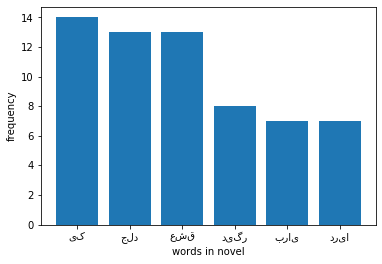

In [12]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(novel_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in novel')
plt.ylabel('frequency')
plt.show()

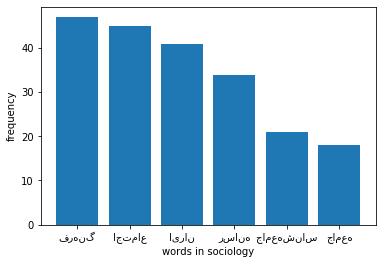

In [13]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(sociology_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in sociology')
plt.ylabel('frequency')
plt.show()

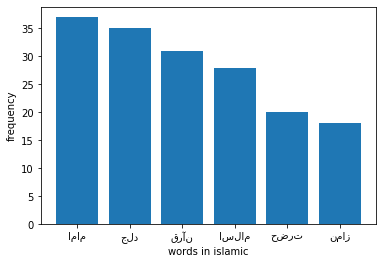

In [14]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(islamic_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in islamic')
plt.ylabel('frequency')
plt.show()

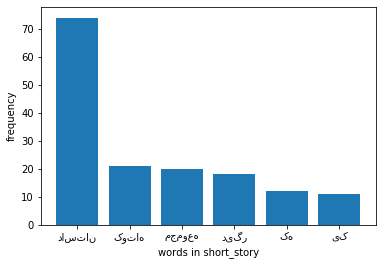

In [15]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(short_story_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in short_story')
plt.ylabel('frequency')
plt.show()

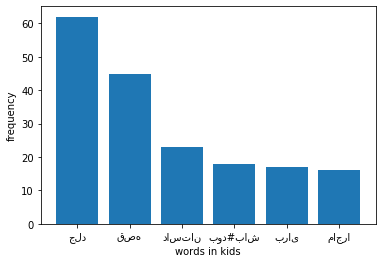

In [16]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(kids_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in kids')
plt.ylabel('frequency')
plt.show()

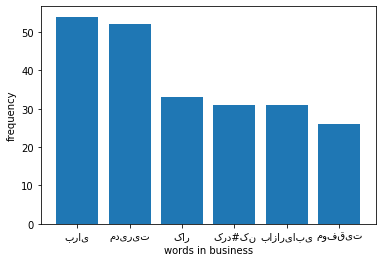

In [17]:
from matplotlib import pyplot as plt
from operator import itemgetter

res = dict(sorted(business_title.items(), key = itemgetter(1), reverse = True)[:6])
keys = res.keys()
values = res.values()
plt.bar(keys, values)
plt.xlabel('words in business')
plt.ylabel('frequency')
plt.show()

In [18]:
tdf = pd.read_csv("books_test.csv")
tdf.head(5)

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
1,داستان‌های برق‌آسا,«داستان‌های برق‌آسا» نام مجموعه داستان‌هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات «بحثی درباره مرجعیت و روحانیت» ش...,کلیات اسلام
3,قلعه‌ی حیوانات,«قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...,رمان
4,قصه ما مثل شد (۱),«قصه ما مثل شد» یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان


We map numbers 0 to 5 to our categories

The function below inputs a title $X$ of a book and calculates $P(c|X)$ for each $c \in \{Novel, Sociology, Islamic, Short Story, Kids, Business \}$ where $X$ is the list of words in the title.

### Q4)

In case that there is word contained only one type of genre, Naive Bayes will definetly choose that genre as the answer which might be wrong in some cases.

When word $x$ hasn't appeared in genre $c$, we have that $P(x|c) = 0$
The reason is that $log(0) = - \infty$ so the sum $ sum_{i=1}^{n} log(P(x_i | c)) $ will converge to $- \infty$ and never will be chosen as the genre since wre choosing the genre which maximizes the sum mentioned above.

### Q5)

Additive smoothing associates the probability

$$ \frac{Word Count + \alpha}{Total Words + \alpha.D} $$

instead of

$$ \frac{Word Count}{Total Words}$$

to $P(Word|c)$

When we wan't no additive smoothing, $\alpha = 0$

Where $\alpha$ is a positive constant and $D$ is the number of distinct words in that category.


This will avoid the $- \infty$ problem mentioned in Q4 since the fraction will never be equal to 0 because of the positive $\alpha$ in the numerator.

In [19]:
def getCat(a):
    genres = ['رمان', 'جامعه‌شناسی', 'کلیات اسلام', 'داستان کوتاه', 'داستان کودک و نوجوانان', 'مدیریت و کسب و کار']
    return genres.index(a)

In [20]:
tdf.head(5)

,title,description,categories
0,کآشوب,«کآشوب (بیست و سه روایت از روضه‌هایی که زندگی ...,داستان کوتاه
1,داستان‌های برق‌آسا,«داستان‌های برق‌آسا» نام مجموعه داستان‌هایی به...,داستان کوتاه
2,بحثی درباره مرجعیت و روحانیت,مجموعه مقالات «بحثی درباره مرجعیت و روحانیت» ش...,کلیات اسلام
3,قلعه‌ی حیوانات,«قلعه‌ی حیوانات» جورج اورول، درباره گروهی از ح...,رمان
4,قصه ما مثل شد (۱),«قصه ما مثل شد» یک مجموعه کتاب ۵ جلدی است که د...,داستان کودک و نوجوانان


There are 4 ways we can use for prediction. 

1. Using book's title based on titles dictionary

2. Using book's description based on titles dictionary

3. Using book's title based on description dictionary

4. Using book's description based on description dictionary

By experimenting, I found out that the 4'th one gives the maximum accuracy.

### First we go for detection without additive smoothing:


In [21]:
from math import log

ZERO = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001


def calcProbsWithoutSmoothing(phrase):
    tokens = word_tokenize(phrase)
    ret = [0, 0, 0, 0, 0, 0]


    for token in tokens:

        word = lemmatizer.lemmatize(token)

        if (word in ignore):
            continue
            
            
        if (word not in novel_descr):
            ret[0] += log(ZERO)
        else:
            ret[0] += log((novel_descr[word]) / (total_novel_descr))
            
        
        if (word not in sociology_descr):
            ret[1] += log(ZERO)
        else:
            ret[1] += log((sociology_descr[word]) / (total_sociology_descr))
            
        
        if (word not in islamic_descr):
            ret[2] += log(ZERO)
        else:
            ret[2] += log((islamic_descr[word]) / (total_islamic_descr))
            
        
        if (word not in short_story_descr):
            ret[3] += log(ZERO)
        else:
            ret[3] += log((short_story_descr[word]) / (total_short_story_descr))
            
                
        if (word not in kids_descr):
            ret[4] += log(ZERO)
        else:
            ret[4] += log((kids_descr[word]) / (total_kids_descr))
     
        
        if (word not in business_descr):
            ret[5] += log(ZERO)
        else:
            ret[5] += log((business_descr[word]) / (total_business_descr))
        
    return ret

In [22]:
detections = [0, 0, 0, 0, 0, 0]
correct_detections = [0, 0, 0, 0, 0, 0]
correct = 0

import random
for index, row in tdf.iterrows():
    
    p_descr_descr = calcProbsWithoutSmoothing(row['description'])

    mx_descr_descr = max(p_descr_descr)

    detect_by_descr_descr = p_descr_descr.index(mx_descr_descr, 0)


    detect = detect_by_descr_descr
    


    category = getCat(row['categories'])
    correct += (category == detect)
    
    detections[detect] += 1
    correct_detections[detect] += (detect == category)

        

In [23]:
print("RESULTS WITHOUT ADDITIVE SOOTHING:")
print()
print("Accuracy is ", correct / len(tdf))
print()

print("Precision, Recall, and F1 for categories 0 to 5 are:")
print()

for i in range(6):
    precision = correct_detections[i] / detections[i]
    recall = correct_detections[i] / 75
    f1 = (2 * precision * recall) / (precision + recall)
    
    print("Precision:", correct_detections[i] / detections[i])
    print("Recall:", correct_detections[i] / 75)
    print("F1:", f1)
    print()

RESULTS WITHOUT ADDITIVE SOOTHING:

Accuracy is  0.6777777777777778

Precision, Recall, and F1 for categories 0 to 5 are:

Precision: 0.49586776859504134
Recall: 0.8
F1: 0.6122448979591837

Precision: 0.6176470588235294
Recall: 0.84
F1: 0.711864406779661

Precision: 0.9344262295081968
Recall: 0.76
F1: 0.838235294117647

Precision: 0.5
Recall: 0.44
F1: 0.46808510638297873

Precision: 0.9130434782608695
Recall: 0.56
F1: 0.6942148760330579

Precision: 0.9259259259259259
Recall: 0.6666666666666666
F1: 0.7751937984496123



### Now we go for detection with additive smoothing:



In [24]:
from math import log


def calcProbsWithSmoothing(phrase):
    tokens = word_tokenize(phrase)
    ret = [0, 0, 0, 0, 0, 0]
    
    k = 1 #alpha

    for token in tokens:

        word = lemmatizer.lemmatize(token)

        if (word in ignore):
            continue
            
        
        ret[0] += log((novel_descr.get(word, 0) + k) / (total_novel_descr + k * distinct_novel_descr))
            
        ret[1] += log((sociology_descr.get(word, 0) + k) / (total_sociology_descr + k * distinct_sociology_descr))
            
        ret[2] += log((islamic_descr.get(word, 0) + k) / (total_islamic_descr + k * distinct_islamic_descr))
            
        ret[3] += log((short_story_descr.get(word, 0) + k) / (total_short_story_descr + k * distinct_short_story_descr))
        
        ret[4] += log((kids_descr.get(word, 0) + k) / (total_kids_descr + k * distinct_kids_descr))
    
        ret[5] += log((business_descr.get(word, 0) + k) / (total_business_descr + k * distinct_business_descr))
        

    return ret

In [25]:
detections = [0, 0, 0, 0, 0, 0]
correct_detections = [0, 0, 0, 0, 0, 0]
correct = 0

import random
for index, row in tdf.iterrows():
    
    p_descr_descr = calcProbsWithSmoothing(row['description'])

    mx_descr_descr = max(p_descr_descr)

    detect_by_descr_descr = p_descr_descr.index(mx_descr_descr, 0)


    detect = detect_by_descr_descr
    


    category = getCat(row['categories'])
    correct += (category == detect)
    
    detections[detect] += 1
    correct_detections[detect] += (detect == category)

        

In [26]:
print("RESULTS WITH ADDITIVE SOOTHING:")
print()
print("Accuracy is ", correct / len(tdf))
print()

print("Precision, Recall, and F1 for categories 0 to 5 are:")
print()

for i in range(6):
    precision = correct_detections[i] / detections[i]
    recall = correct_detections[i] / 75
    f1 = (2 * precision * recall) / (precision + recall)
    
    print("Precision:", correct_detections[i] / detections[i])
    print("Recall:", correct_detections[i] / 75)
    print("F1:", f1)
    print()

RESULTS WITH ADDITIVE SOOTHING:

Accuracy is  0.7577777777777778

Precision, Recall, and F1 for categories 0 to 5 are:

Precision: 0.8372093023255814
Recall: 0.48
F1: 0.6101694915254237

Precision: 0.8051948051948052
Recall: 0.8266666666666667
F1: 0.8157894736842106

Precision: 0.9117647058823529
Recall: 0.8266666666666667
F1: 0.8671328671328671

Precision: 0.7884615384615384
Recall: 0.5466666666666666
F1: 0.6456692913385826

Precision: 0.5511811023622047
Recall: 0.9333333333333333
F1: 0.693069306930693

Precision: 0.8433734939759037
Recall: 0.9333333333333333
F1: 0.8860759493670886

